# **EDA**

In [1]:
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('movies_metadata.csv')
df.head().transpose()

C:\Users\Mohit Computers\AppData\Local\Temp\ipykernel_11212\1595054.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_metadata.csv')


,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
df=df.drop(['imdb_id'],axis=1)

In [7]:
df[df['original_title']!=df['title']][['title','original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [8]:
#As we can see that original title column are in different language so we can drop it 
df=df.drop(['original_title'],axis=1)

In [9]:
#lets check revenue columns which have 0 values
df[df['revenue']==0].shape

(38052, 22)

In [10]:
#as we see most of the movies revenue are not provided so either we can drop this column or fill these 0 values with null because may be these will useful for us
df['revenue']=df['revenue'].replace(0,np.NaN)

In [11]:
df[df['budget']!='0'].shape
#As we see budget have object datatype and contain 0 values so we have to replace 0 to null and convert the datatype of budget features

(8893, 22)

In [12]:
df['budget']=pd.to_numeric(df['budget'],errors='coerce')
df['budget']=df['budget'].replace(0,np.NaN)
df[df['budget'].isnull()].shape

(36576, 22)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 8890 non-null   float64
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   original_language      45455 non-null  object 
 7   overview               44512 non-null  object 
 8   popularity             45461 non-null  object 
 9   poster_path            45080 non-null  object 
 10  production_companies   45463 non-null  object 
 11  production_countries   45463 non-null  object 
 12  release_date           45379 non-null  object 
 13  revenue                7408 non-null   float64
 14  runtime                45203 non-null  float64
 15  sp

In [14]:
#now we have to add extra features called return_ratio which define the sucuess of movie according to box office.
df['return_ratio']=df['revenue'] / df['budget']
df[df['return_ratio'].isnull()].shape


(40085, 23)

In [15]:
#Unfortunatly we get only 5000 movies having non null return ratio values but still it is useful in many cases
#now we going to add an extra feature called year. Which define the only the year of movie release
df['year']=pd.to_datetime(df['release_date'],errors='coerce').apply(lambda x: str(x).split('-')[0] if x!=np.nan else np.nan)

In [16]:
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
poster_path,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [17]:
df['adult'] = df['adult'].map({'True': True, 'False': False})
df['adult'].value_counts()

adult
False    45454
True         9
Name: count, dtype: int64

In [18]:
#we can see that there are almost all the movies are non adult so it should be better to remove this column
df=df.drop('adult',axis=1)

In [19]:
#now we are going to add html image to movie poster path image so we can see it in html format in analysis
base_url='http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_url + df['poster_path'] + "' style='height:100px;'>"
df.head().transpose()



,0,1,2,3,4
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//e64s...
production_companies,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'name': 'Sandollar Productions', 'id': 5842}..."


In [20]:
df['title']=df['title'].astype(str)
title_string=' '.join(df['title'])


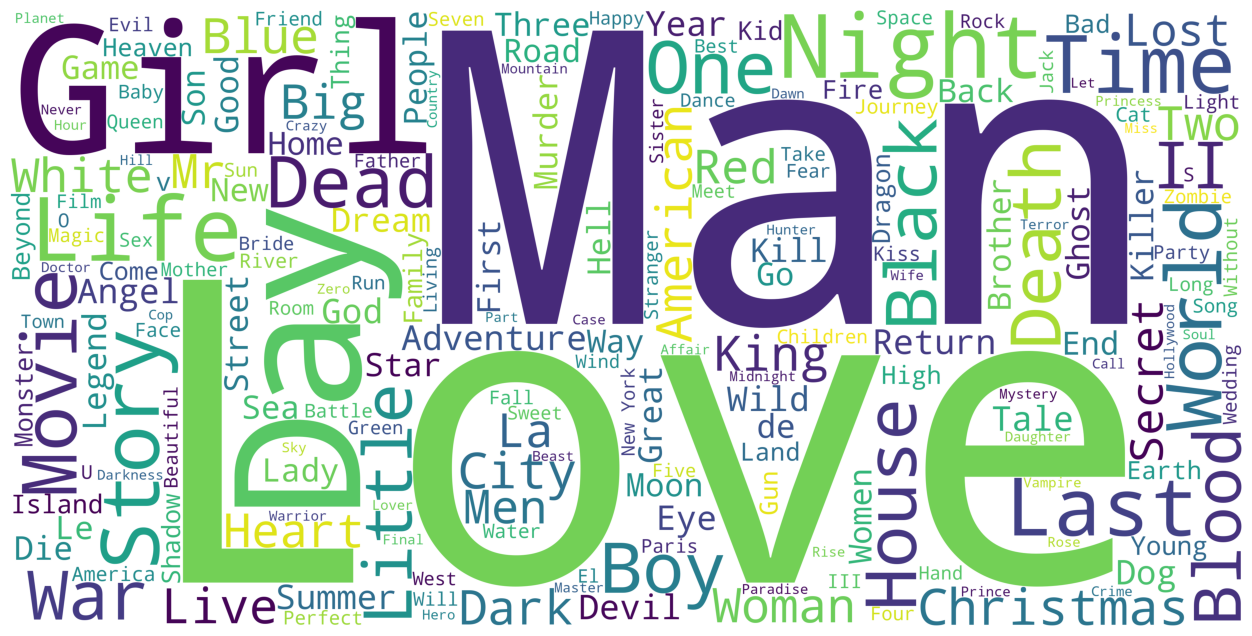

In [21]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_string)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

We can see above word cloud the word "Love,Girl,Man" have most frequency so i think most of the movies romantic

In [22]:
df['overview']=df['overview'].astype(str)
overview_string=' '.join(df['overview'])

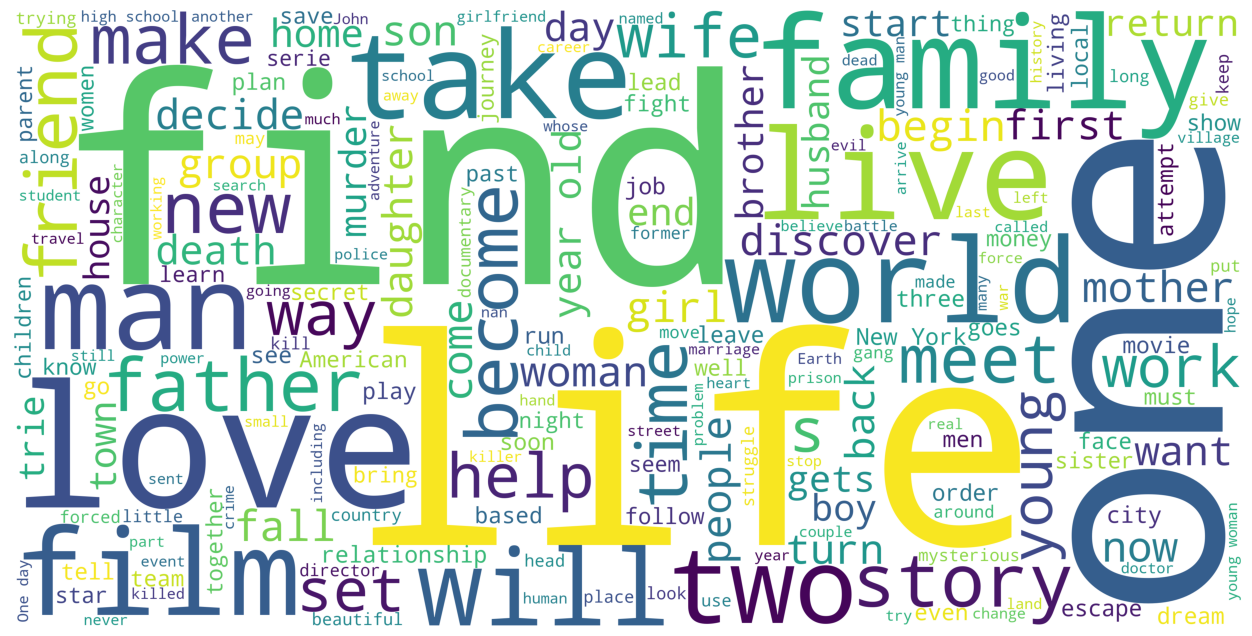

In [23]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_string)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In above wordcloud we can see that the words "Life,Find,Love,Family" have the most frequency so we can assume that the theme of most movies

In [24]:
df[df['original_language']=='en'].shape

(32269, 23)

we can see that most of the movies are in english language . So i think we should the most location of movies where they filmed


In [25]:
# english_count = df['spoken_languages'].apply(lambda languages: any(lang['iso_639_1'] == 'en' for lang in ast.literal_eval(languages))).sum()
# english_count


Now we are going to extract country from production_countries features. First we convert the feature column into dictionary format by using ast.literal_eval() function

In [26]:
df['production_countries']=df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries']=df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [27]:
df['production_countries'].head()

0    [United States of America]
1    [United States of America]
2    [United States of America]
3    [United States of America]
4    [United States of America]
Name: production_countries, dtype: object

We have to convert our features column production_countriwes into series because it is pre in different format. 

In [28]:
series=df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1,drop=True)
series.name='countries'

Now we make another dataFrame for analysis purpose. In this dataFrame we add our series column in it and then count the number of movies in each country

In [29]:
countries_df=df.drop('production_countries',axis=1).join(series)
countries_df=pd.DataFrame(countries_df['countries'].value_counts())
countries_df['countries']=countries_df.index
countries_df.columns=['NumberOfMovies','Country']
countries_df=countries_df.reset_index().drop('countries',axis=1)
countries_df.head(20)

,NumberOfMovies,Country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [30]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,NaN,NaN,NaN,"{'id': 645, 'name': 'James Bond Collection', '..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN,60000000.0,58000000.0,NaN,35000000.0,58000000.0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.mgm.com/view/movie/757/Goldeneye/
id,862,8844,15602,31357,11862,949,11860,45325,9091,710
original_language,en,en,en,en,en,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519,17.924927,6.677277,2.561161,5.23158,14.686036
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//e64s...,<img src='http://image.tmdb.org/t/p/w185//zMyf...,<img src='http://image.tmdb.org/t/p/w185//jQh1...,<img src='http://image.tmdb.org/t/p/w185//sGO5...,<img src='http://image.tmdb.org/t/p/w185//eoWv...,<img src='http://image.tmdb.org/t/p/w185//5c0o...
production_companies,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'name': 'United Artists', 'id': 60}, {'name'..."


lets Explore most movies and earning produced by production companies . We use same concept as we use for country

In [31]:

# df['production_companies']=df['production_companies'].fillna('[]').apply(ast.literal_eval)
# df['production_companies']=df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [32]:
df['production_companies'].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [33]:
series=df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1,drop=True)
series.name='companies'

In [34]:
companies_df=df.drop('production_companies', axis=1).join(series)

In [35]:
total_revenue=pd.DataFrame(companies_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
total_revenue.columns=['Total']
average=pd.DataFrame(companies_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
average.columns=['Average']
total_movies=pd.DataFrame(companies_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
total_movies.columns=['No of Movies']
new_df=pd.concat((total_revenue,average,total_movies),axis=1)


In [36]:
new_df.sort_values('Total',ascending=False).head(10)

,Total,Average,No of Movies
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


As we see Warner Bros. has most revenue and most number of movies. So we can say that it is most earning company.

#lets find out which company is most sucessful according to mean or average of revenue

In [37]:
new_df[new_df['No of Movies']>=15].sort_values('Average',ascending=False).head(10)

,Total,Average,No of Movies
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


Lets find out the number of language in each movies

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4494 non-null   object 
 1   budget                 8890 non-null   float64
 2   genres                 45466 non-null  object 
 3   homepage               7782 non-null   object 
 4   id                     45466 non-null  object 
 5   original_language      45455 non-null  object 
 6   overview               45466 non-null  object 
 7   popularity             45461 non-null  object 
 8   poster_path            45080 non-null  object 
 9   production_companies   45466 non-null  object 
 10  production_countries   45466 non-null  object 
 11  release_date           45379 non-null  object 
 12  revenue                7408 non-null   float64
 13  runtime                45203 non-null  float64
 14  spoken_languages       45460 non-null  object 
 15  st

In [39]:
df['original_language'].head(10)

0    en
1    en
2    en
3    en
4    en
5    en
6    en
7    en
8    en
9    en
Name: original_language, dtype: object

In [40]:
df['original_language'].nunique()

92

So there are 92 languages movies

In [41]:
languages=pd.DataFrame(df['original_language'].value_counts())
languages['language'] = languages.index
languages.columns=['number','language']
languages.head()

,number,language
original_language,,
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


Lets find out popularity of movies in accordance to the vode average and vote count

In [42]:
df.head().transpose()

,0,1,2,3,4
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//e64s...
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"


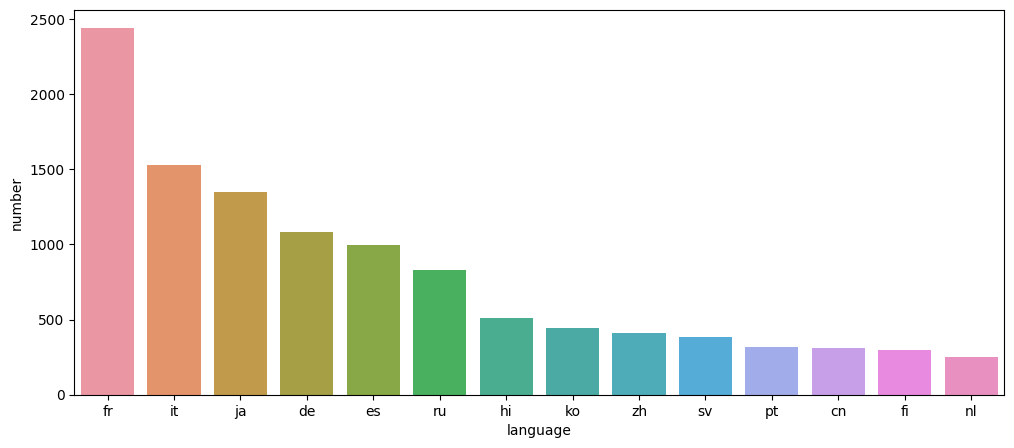

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=languages.iloc[1:15])
plt.show()

Lets work on the popularity , votes and vote count of movies and try to find which movie has is most popular according to these features.

In [44]:
#first we have to convert all the values of each column into numbers
def convert(x):
    try:
        return float(x)
    except:
        return np.nan

In [45]:
df['popularity']=df['popularity'].apply(convert)
df['vote_count']=df['vote_count'].apply(convert)
df['vote_average']=df['vote_average'].apply(convert)

In [46]:
#let first explore popularity score of movies
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

We can see that the maximum popularity score is 547 but there is 75 percentile =3.67. So we can say that most of the movies lies below 10

c:\Users\Mohit Computers\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


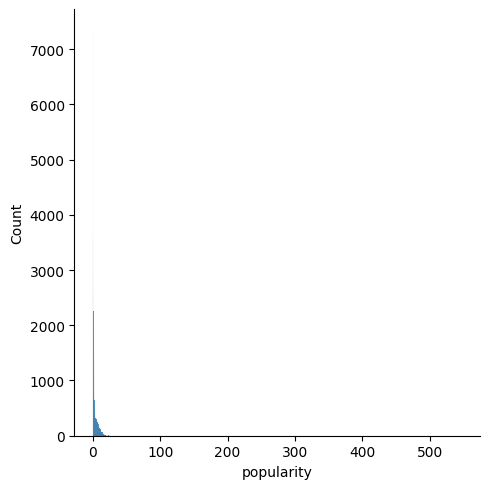

In [47]:
#lets make histogram of popularity score
sns.displot(df['popularity'].fillna(df['popularity'].mean()))
plt.show()

we can see that most of the movies is under 10

Now Lets find out most popular movies according to popularity score

In [48]:
df[['title','popularity','year']].sort_values('popularity',ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [49]:
df['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [50]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

According to vote_count 75% movies are below 40. Means we have very few movies are popular or high vote count.


Lets find out which top 10 movies are highly votes

In [51]:
df[['title','year','vote_average','vote_count']].sort_values('vote_average',ascending=False).head(10)

,title,year,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,2005,10.0,1.0
15710,If God Is Willing and da Creek Don't Rise,2010,10.0,1.0
22396,Meat the Truth,2008,10.0,1.0
22395,Marvin Hamlisch: What He Did For Love,2013,10.0,1.0
35343,Elaine Stritch: At Liberty,2002,10.0,1.0
186,Reckless,1995,10.0,1.0
45047,The Human Surge,2016,10.0,1.0
22377,The Guide,2011,10.0,1.0
22346,هیچ کجا هیچ کس,2013,10.0,1.0
1634,Other Voices Other Rooms,1995,10.0,1.0


In [52]:
df[['title','year','vote_average','vote_count']].sort_values('vote_count',ascending=False).head(10)

,title,year,vote_average,vote_count
15480,Inception,2010,8.1,14075.0
12481,The Dark Knight,2008,8.3,12269.0
14551,Avatar,2009,7.2,12114.0
17818,The Avengers,2012,7.4,12000.0
26564,Deadpool,2016,7.4,11444.0
22879,Interstellar,2014,8.1,11187.0
20051,Django Unchained,2012,7.8,10297.0
23753,Guardians of the Galaxy,2014,7.9,10014.0
2843,Fight Club,1999,8.3,9678.0
18244,The Hunger Games,2012,6.9,9634.0


In [53]:
df[df['vote_count']>500].shape[0]

2049

Lets work on the month feature and try to find out which month is most suitable for movie release

In [54]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [55]:
def getMonth(x):
    try:
        return months[int(str(x).split('-')[1])-1]
    except:
        return np.nan

In [56]:
def getWeekDay(x):
    try:
        year,month,day=(int(i) for i in x.split('-'))
        day_number=datetime.date(year,month,day).weekday()
        return days[day_number]
    except:
        return np.nan

In [57]:
df['month']=df['release_date'].apply(getMonth)
df['day']=df['release_date'].apply(getWeekDay)

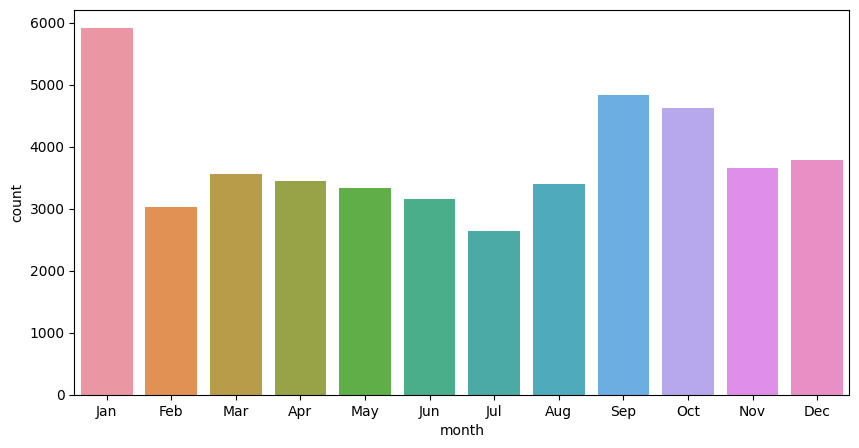

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df,order=months)
plt.show()

So most of the movies are release in jan,sep,oct

Lets check which day the most of movies are released

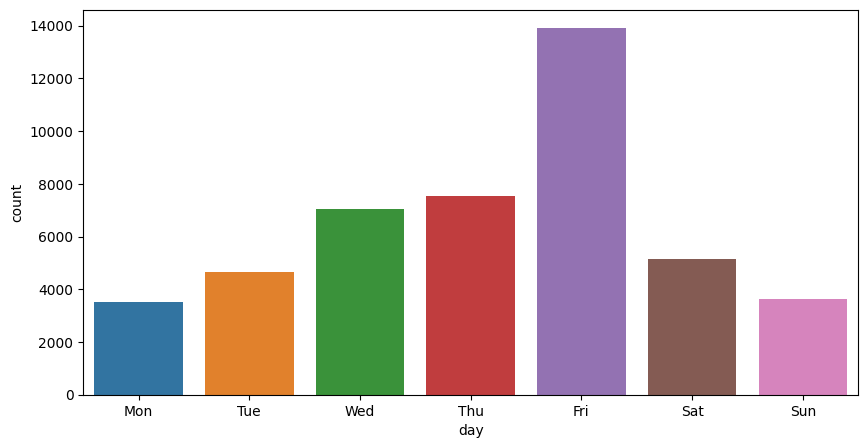

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df,order=days)
plt.show()

Lets find out which month is most sucessfull according to the revenue

<Axes: xlabel='mon', ylabel='revenue'>

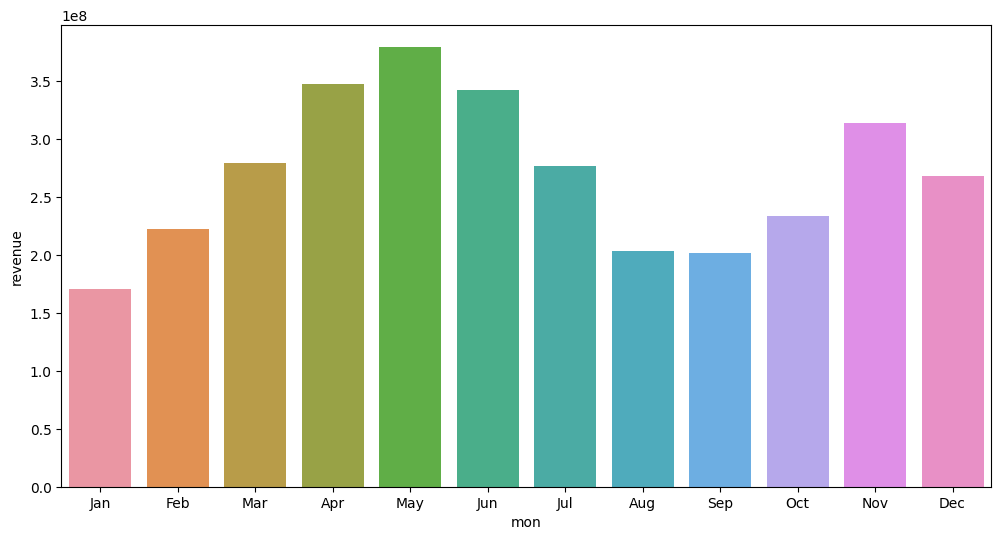

In [60]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
sns.barplot(x='mon', y='revenue', data=month_mean, order=months)

Summer holidays is best for movies release date

# **Recommendation Model**


Cetogorical Recommendation

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [62]:
df['genres']=df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

# lets use tmdb rating to get our top movies.
*Note: I get this idea from kaggle*

- Weighted Rating (WR) =  ((v/(v+m)).R)+((m/(v+m)).C)
 
where,
1. v is the number of votes for the movie
2. m is the minimum votes required to be listed in the chart
3. R is the average rating of the movie
4. C is the mean vote across the whole report

In [63]:
df['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [64]:
vote_count=df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_average=df[df['vote_average'].notnull()]['vote_average'].astype('int')
C=vote_average.mean()
m=vote_count.quantile(0.95)
print(m,C)

434.0 5.244896612406511


So the top movies will be equal or greater than 434 vote count value and 5.24 of vote average value

In [65]:
df.head().transpose()

,0,1,2,3,4
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,NaN,16000000.0,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//e64s...
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"


Lets build our function to get movies related to Category or genres

In [66]:
# def values(x):
#     vote_count=x[x['vote_count'].notnull()]['vote_count'].astype('int')
#     vote_average=x[x['vote_average'].notnull()]['vote_average'].astype('int')
#     C=vote_average.mean()
#     m=vote_count.quantile(0.80)
#     return C , m
# def weight_rating(x):
#     v=x['vote_count']
#     R=x['vote_average']
#     return (v/(v+m) * R) + (m/(m+v) * C)

In [67]:
series=df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
series.name='genres'
genres_df=df.drop('genres',axis=1).join(series)

In [68]:
genres_df.head(10)

,belongs_to_collection,budget,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,...,tagline,title,video,vote_average,vote_count,return_ratio,year,month,day,genres
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],...,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Oct,Mon,Animation
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],...,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Oct,Mon,Comedy
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],...,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Oct,Mon,Family
1,NaN,65000000.0,NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Dec,Fri,Adventure
1,NaN,65000000.0,NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Dec,Fri,Fantasy
1,NaN,65000000.0,NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Dec,Fri,Family
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,NaN,15602,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",[United States of America],...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Dec,Fri,Romance
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,NaN,15602,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",[United States of America],...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Dec,Fri,Comedy
3,NaN,16000000.0,NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],[United States of America],...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,Dec,Fri,Comedy
3,NaN,16000000.0,NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],[United States of America],...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,Dec,Fri,Drama


In [69]:
def top_movies(category):
    dummy_df=genres_df[genres_df['genres']==category]
    vote_counts = dummy_df[dummy_df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = dummy_df[dummy_df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.85)
    top_movies=dummy_df[(dummy_df['vote_count']>=m) & (dummy_df['vote_count'].notnull() & dummy_df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
    top_movies['vote_count']=top_movies['vote_count'].astype('int')
    top_movies['vote_average']=top_movies['vote_average'].astype('int')
    top_movies['weight']=top_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C),axis=1)
    top_movies=top_movies.sort_values('weight', ascending=False).head(250)
    return top_movies
    

In [71]:
top_movies('Action').head(15)

,title,year,vote_count,vote_average,popularity,genres,weight
15480,Inception,2010,14075,8,29.108149,Action,7.955099
12481,The Dark Knight,2008,12269,8,123.167259,Action,7.948610
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,Action,7.929579
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,Action,7.924031
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,Action,7.918382
256,Star Wars,1977,6778,8,42.149697,Action,7.908327
1154,The Empire Strikes Back,1980,5998,8,19.470959,Action,7.896841
4135,Scarface,1983,3017,8,11.299673,Action,7.802046
9430,Oldboy,2003,2000,8,10.616859,Action,7.711649
1910,Seven Samurai,1954,892,8,15.017770,Action,7.426145


# Content Based Recommender

In this recommendation system there could be certain steps to be done:
1. Merge movie dataset with keywords and credits
2. Then we use matrix vactorization techniques to create matrixes of dataset
3. Then we find cosine similarity
4. Through cosine similarity we will find out best recommendation related to our content

In [72]:
movies_df=df

In [73]:
movies_df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return_ratio,year,month,day
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],...,Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Oct,Mon
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Dec,Fri
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[Romance, Comedy]",NaN,15602,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Dec,Fri
3,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,Dec,Fri
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,[Comedy],NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[Sandollar Productions, Touchstone Pictures]",...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995,Feb,Fri


In [74]:
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [75]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4494 non-null   object 
 1   budget                 8890 non-null   float64
 2   genres                 45466 non-null  object 
 3   homepage               7782 non-null   object 
 4   id                     45466 non-null  object 
 5   original_language      45455 non-null  object 
 6   overview               45466 non-null  object 
 7   popularity             45460 non-null  float64
 8   poster_path            45080 non-null  object 
 9   production_companies   45466 non-null  object 
 10  production_countries   45466 non-null  object 
 11  release_date           45379 non-null  object 
 12  revenue                7408 non-null   float64
 13  runtime                45203 non-null  float64
 14  spoken_languages       45460 non-null  object 
 15  st

I encountered an error of converting movies dataset type to integer. I think there would be some rows having different format that cause error so we have to find these rows then drop it form our dataset

In [76]:
index_m=[]
for index,value in movies_df['id'].items():
    try:
        int(value)
    except:
        index_m.append((index,value))
print(index_m)

[(19730, '1997-08-20'), (29503, '2012-09-29'), (35587, '2014-01-01')]


So we have to drop these row

In [77]:
movies_df=movies_df.drop([19730,29503,35587])

In [78]:
movies_df['id'] = movies_df['id'].astype('int')

In [79]:
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 8890 non-null   float64
 2   genres                 45463 non-null  object 
 3   homepage               7779 non-null   object 
 4   id                     45463 non-null  int32  
 5   original_language      45452 non-null  object 
 6   overview               45463 non-null  object 
 7   popularity             45460 non-null  float64
 8   poster_path            45077 non-null  object 
 9   production_companies   45463 non-null  object 
 10  production_countries   45463 non-null  object 
 11  release_date           45376 non-null  object 
 12  revenue                7408 non-null   float64
 13  runtime                45203 non-null  float64
 14  spoken_languages       45460 non-null  object 
 15  status 

In [80]:
smd = movies_df[movies_df['id'].isin(links_small)]
smd.shape

(9099, 25)

In [81]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

C:\Users\Mohit Computers\AppData\Local\Temp\ipykernel_11212\3912728496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smd['tagline'] = smd['tagline'].fillna('')
C:\Users\Mohit Computers\AppData\Local\Temp\ipykernel_11212\3912728496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smd['description'] = smd['overview'] + smd['tagline']
C:\Users\Mohit Computers\AppData\Local\Temp\ipykernel_11212\3912728496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [82]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [83]:
tfidf_matrix.shape

(9099, 268124)

In [84]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [85]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [86]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [88]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object